## Amazon Sentiment Analysis

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from textblob import TextBlob 
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

In [2]:
# pd.set_options shows us all the rows 
pd.set_option('display.max_rows', None)

In [3]:
Amazon = pd.read_csv('Copy of amazon.csv')

### Data Assessment & Cleaning

In [4]:
Amazon_clean = Amazon.copy()

In [5]:
Amazon_clean.head()

,Unnamed: 0,reviewerName,overall,reviewText,reviewTime,day_diff,helpful_yes,helpful_no,total_vote,score_pos_neg_diff,score_average_rating,wilson_lower_bound
0,0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


1. Drop the unnamed: 0 index column 
2. Change the initials of the column headers

In [6]:
# drop unnamed column using .drop
Amazon_clean.drop('Unnamed: 0', inplace = True, axis = 1)

In [7]:
Amazon_clean.columns

Index(['reviewerName', 'overall', 'reviewText', 'reviewTime', 'day_diff',
       'helpful_yes', 'helpful_no', 'total_vote', 'score_pos_neg_diff',
       'score_average_rating', 'wilson_lower_bound'],
      dtype='object')

In [8]:
# capitalizing initials of the column headers 
Amazon_clean.columns = Amazon_clean.columns.str.capitalize()

In [9]:
Amazon_clean.head()

,Reviewername,Overall,Reviewtext,Reviewtime,Day_diff,Helpful_yes,Helpful_no,Total_vote,Score_pos_neg_diff,Score_average_rating,Wilson_lower_bound
0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0


In [10]:
# Checking for null values 
Amazon_clean.isnull().sum()

Reviewername            1
Overall                 0
Reviewtext              1
Reviewtime              0
Day_diff                0
Helpful_yes             0
Helpful_no              0
Total_vote              0
Score_pos_neg_diff      0
Score_average_rating    0
Wilson_lower_bound      0
dtype: int64

In [11]:
#checking for duplicates in the dataframe 
Amazon_clean.duplicated().sum()

0

In [12]:
# checking for duplicate in the review column
Amazon_clean['Reviewtext'].duplicated().sum()

2

In [13]:
# to see the rows containing this duplicates 
duplicates = Amazon_clean[['Reviewtext']][Amazon_clean['Reviewtext'].duplicated(keep=False)]
duplicates

,Reviewtext
0,No issues.
309,Works fine my Virgin Mobile HTC EVO V. The pho...
913,Works fine my Virgin Mobile HTC EVO V. The pho...
3638,No issues.


In [14]:
Amazon_clean['Reviewtext'][913]

"Works fine my Virgin Mobile HTC EVO V. The phone didn't recognize it at first, but after formatting it's all good."

In [15]:
# converting Review text column to string datatype
Amazon_clean['Reviewtext'] = Amazon_clean['Reviewtext'].astype(str)

In [16]:
# generating polarity and subjectivity for the sentiments
for index, row in Amazon_clean.iterrows(): # iterating each column for the Amazon_clean dataframe
    text = row['Reviewtext'] # specifying the particular row to perform sentiment analysis
    blob = TextBlob(text)
    sentiment = blob.sentiment
    Amazon_clean.loc[index, 'Polarity'] = sentiment.polarity
    Amazon_clean.loc[index, 'Subjectivity'] = sentiment.subjectivity

In [17]:
Amazon_clean.head()

,Reviewername,Overall,Reviewtext,Reviewtime,Day_diff,Helpful_yes,Helpful_no,Total_vote,Score_pos_neg_diff,Score_average_rating,Wilson_lower_bound,Polarity,Subjectivity
0,NaN,4,No issues.,23-07-2014,138,0,0,0,0,0.0,0.0,0.000000,0.000
1,0mie,5,"Purchased this for my device, it worked as adv...",25-10-2013,409,0,0,0,0,0.0,0.0,0.200000,0.200
2,1K3,4,it works as expected. I should have sprung for...,23-12-2012,715,0,0,0,0,0.0,0.0,0.129167,0.525
3,1m2,5,This think has worked out great.Had a diff. br...,21-11-2013,382,0,0,0,0,0.0,0.0,0.000000,0.550
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",13-07-2013,513,0,0,0,0,0.0,0.0,0.386667,0.360


In [18]:
# create a sentiment column to define Neutral, Positive and Negative
def polarity_sentiment(sentiment):
    if sentiment > 0:
        return 'Positive'
    elif sentiment == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
Amazon_clean['Sentiment'] = Amazon_clean['Polarity'].apply(polarity_sentiment)
Amazon_clean['Sentiment'].value_counts()

Positive    4162
Negative     469
Neutral      284
Name: Sentiment, dtype: int64

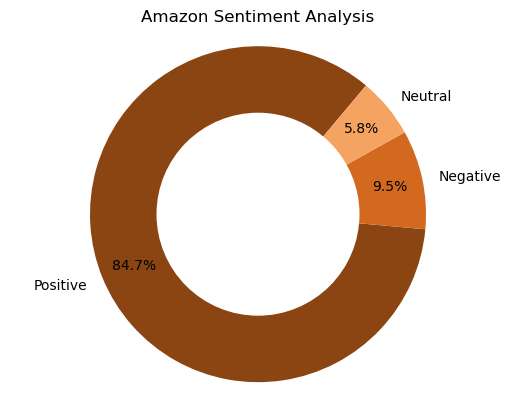

In [28]:
# creating a doughnut chart to showcase the different sentiment by percentage
Amazon_sentiment = Amazon_clean['Sentiment'].value_counts()
labels = ['Positive', 'Negative', 'Neutral']
colors = ['#8B4513', '#D2691E', '#F4A460']
inner_radius = 0.6

fig, ax = plt.subplots()
ax.pie(Amazon_sentiment, labels=labels, colors=colors, autopct='%1.1f%%', startangle=50, pctdistance=0.8)
ax.axis('equal')
plt.title('Amazon Sentiment Analysis')
circle = plt.Circle((0, 0), inner_radius, color='white') # Create another circle to map out the doughnut chart
ax.add_artist(circle)
plt.savefig('Amazon sentiment analysis.png')

### Comsidering other Features to support our Analysis

To support the sentiment analysis performed by the Textblob algorithm, let's consider other features like Overall(rating), and review time series analysis 

In [20]:
# Assessing other features 
Amazon_clean.dtypes

Reviewername             object
Overall                   int64
Reviewtext               object
Reviewtime               object
Day_diff                  int64
Helpful_yes               int64
Helpful_no                int64
Total_vote                int64
Score_pos_neg_diff        int64
Score_average_rating    float64
Wilson_lower_bound      float64
Polarity                float64
Subjectivity            float64
Sentiment                object
dtype: object

Review time should be in datetime datatype

In [21]:
# Convert to datetime datatype
Amazon_clean['Reviewtime'] = pd.to_datetime(Amazon_clean['Reviewtime'])
Amazon_clean['Reviewtime'].dtype

dtype('<M8[ns]')

In [22]:
#Extract the year
Amazon_clean['Review_year'] = Amazon_clean['Reviewtime'].dt.year

In [23]:
# Extract the Month
Amazon_clean['Review_Month'] =  Amazon_clean['Reviewtime'].dt.strftime('%b')

In [24]:
Amazon_clean.head()

,Reviewername,Overall,Reviewtext,Reviewtime,Day_diff,Helpful_yes,Helpful_no,Total_vote,Score_pos_neg_diff,Score_average_rating,Wilson_lower_bound,Polarity,Subjectivity,Sentiment,Review_year,Review_Month
0,NaN,4,No issues.,2014-07-23,138,0,0,0,0,0.0,0.0,0.000000,0.000,Neutral,2014,Jul
1,0mie,5,"Purchased this for my device, it worked as adv...",2013-10-25,409,0,0,0,0,0.0,0.0,0.200000,0.200,Positive,2013,Oct
2,1K3,4,it works as expected. I should have sprung for...,2012-12-23,715,0,0,0,0,0.0,0.0,0.129167,0.525,Positive,2012,Dec
3,1m2,5,This think has worked out great.Had a diff. br...,2013-11-21,382,0,0,0,0,0.0,0.0,0.000000,0.550,Neutral,2013,Nov
4,2&amp;1/2Men,5,"Bought it with Retail Packaging, arrived legit...",2013-07-13,513,0,0,0,0,0.0,0.0,0.386667,0.360,Positive,2013,Jul


In [25]:
number_of_review_by_year = Amazon_clean['Review_year'].value_counts().sort_values(ascending = True)
number_of_review_by_year

2012     501
2014    1736
2013    2678
Name: Review_year, dtype: int64

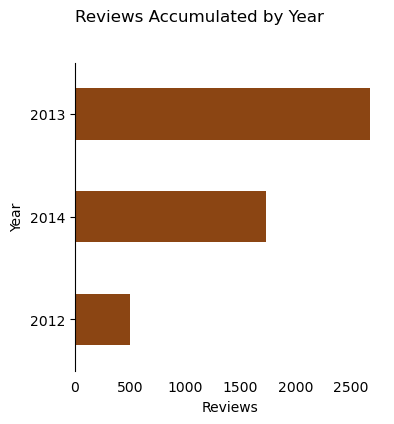

In [26]:
plt.figure(figsize=(4,4))

number_of_review_by_year.plot(kind = 'barh', color = '#8B4513')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.ylabel('Year')
plt.tick_params(bottom = False)
plt.title('Reviews Accumulated by Year', loc = 'left', pad=30)
plt.xlabel('Reviews')
plt.show()

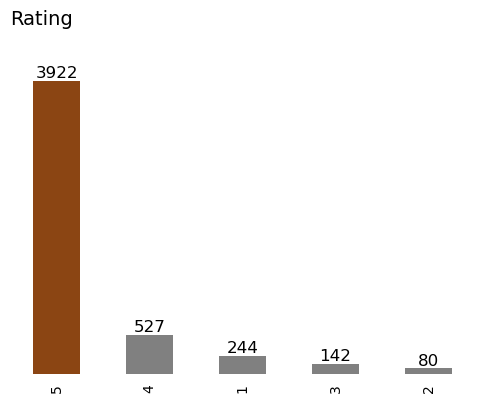

In [27]:
# Analysing ratings 
Amazon_overall = Amazon_clean['Overall'].value_counts()
Amazon_overall.plot(kind='bar',color='grey', figsize=(6, 4))

# Get the current Axes object
ax = plt.gca()

# Customize the plot using matplotlib methods
location = ['left', 'right', 'top', 'bottom']
ax.set_yticks([])
for i in ax.containers:
    ax.bar_label(i, label_type = 'edge', fontsize=12)
for l in location:
    ax.spines[l].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.set_title('Rating', fontsize=14, loc='left', pad=30)
ax.patches[0].set_facecolor('#8B4513')

plt.show()


In conclusion, from the analysis above, most customers gave good reviews or positive and ratings on Amazon products.